In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from plot_util import plot_history

Using TensorFlow backend.


In [0]:
TRAIN_DIR = './data/dogs-vs-cats-small/train'
VAL_DIR = './data/dogs-vs-cats-small/validation'

In [3]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3 ,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [5]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_iter = train_gen.flow_from_directory(TRAIN_DIR, target_size=(150, 150), batch_size=32, class_mode='binary')

val_gen = ImageDataGenerator(rescale=1./255)
val_iter = val_gen.flow_from_directory(VAL_DIR, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
history = model.fit_generator(
    train_iter, steps_per_epoch=100, epochs=100,
    validation_data=val_iter, validation_steps=50, 
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 34s - loss: 0.6934 - acc: 0.5191 - val_loss: 0.7244 - val_acc: 0.5000
Epoch 2/100
 - 29s - loss: 0.6860 - acc: 0.5435 - val_loss: 0.6731 - val_acc: 0.5800
Epoch 3/100
 - 29s - loss: 0.6748 - acc: 0.5781 - val_loss: 0.6574 - val_acc: 0.5980
Epoch 4/100
 - 29s - loss: 0.6643 - acc: 0.6003 - val_loss: 0.6414 - val_acc: 0.6190
Epoch 5/100
 - 29s - loss: 0.6561 - acc: 0.6037 - val_loss: 0.6273 - val_acc: 0.6240
Epoch 6/100
 - 29s - loss: 0.6382 - acc: 0.6253 - val_loss: 0.6304 - val_acc: 0.6280
Epoch 7/100
 - 29s - loss: 0.6212 - acc: 0.6494 - val_loss: 0.5935 - val_acc: 0.6730
Epoch 8/100
 - 29s - loss: 0.6041 - acc: 0.6606 - val_loss: 0.5652 - val_acc: 0.7100
Epoch 9/100
 - 29s - loss: 0.5999 - acc: 0.6687 - val_loss: 0.5543 - val_acc: 0.7020
Epoch 10/100
 - 29s - loss: 0.5945 - acc: 0.6800 - val_loss: 0.5486 - val_acc: 0.7040
Epoch 11/100
 - 29s - loss: 0.5894 - acc: 0.6828 - val_loss: 0.5402 - val_acc: 0.7130
Epoch 12/100
 -

In [0]:
model.save('4_simple_model_data_augment.h5')

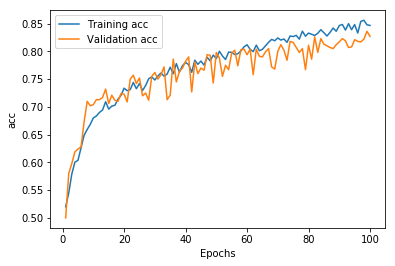

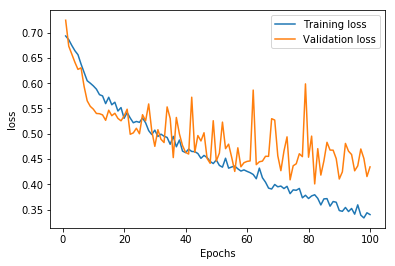

In [8]:
plot_history(history, metrics=('acc', 'loss'))